# Random variable, stochastic process and simulation.

In [2]:
#First let's load the main scientific and plotting libraries we will need 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
import numpy as np
import scipy as sp

## Random numbers, probability distribution and infernece libraries.

- The [**numpy.random**](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) has the fastest random number generators that are based on low level code written in C. <br>
- The [**Scipy.stats**](https://docs.scipy.org/doc/scipy/reference/stats.html ) has an extensive library of statistical distributions and tools for statistical analysis. <br> 
- The [**Statsmodels**](https://www.statsmodels.org/stable/ ) Enhancing Scipy functionality with more tools for stat snslysis 
- The [**Seaborn**](https://docs.pymc.io/) library that enhanced matplotlib functionality for easy stat visualization.  
<br>
- [**PyMC3**](https://docs.pymc.io/) and [**PyStan**](https://pystan.readthedocs.io/en/latest/#) powerhouse libaries for Probabilistic modeling, MCMC and Bayesian inference. 
- Also check out [**Sampyl**](http://mcleonard.github.io/sampyl/).
<br>

## General overview of random numbers in python 

First we take a look at most widely used random numbers of numpy also called standard random numbers. These are rand (uniform random number on interval 0,1) and randn (stnadard normal random number with 0 mean and 1 variance). Useful Tip: when writing any code withr andom numbers is pay attention to the seed. If you want to test your code use the same seed to check for reproducability. 

In [16]:
#np.random.seed(8376743) 
np.random.rand(10) # Generates standard uniform random numbers U(0,1)

array([0.74379619, 0.00642505, 0.75744572, 0.59110962, 0.19142496,
       0.52802932, 0.43521122, 0.67395983, 0.85603975, 0.15983814])

(array([500., 504., 552., 475., 483., 519., 491., 527., 524., 504., 485.,
        455., 507., 491., 492., 493., 477., 511., 513., 497.]),
 array([1.76327386e-04, 5.01670835e-02, 1.00157840e-01, 1.50148596e-01,
        2.00139352e-01, 2.50130108e-01, 3.00120864e-01, 3.50111620e-01,
        4.00102376e-01, 4.50093132e-01, 5.00083888e-01, 5.50074644e-01,
        6.00065400e-01, 6.50056156e-01, 7.00046912e-01, 7.50037668e-01,
        8.00028425e-01, 8.50019181e-01, 9.00009937e-01, 9.50000693e-01,
        9.99991449e-01]),
 <a list of 20 Patch objects>)

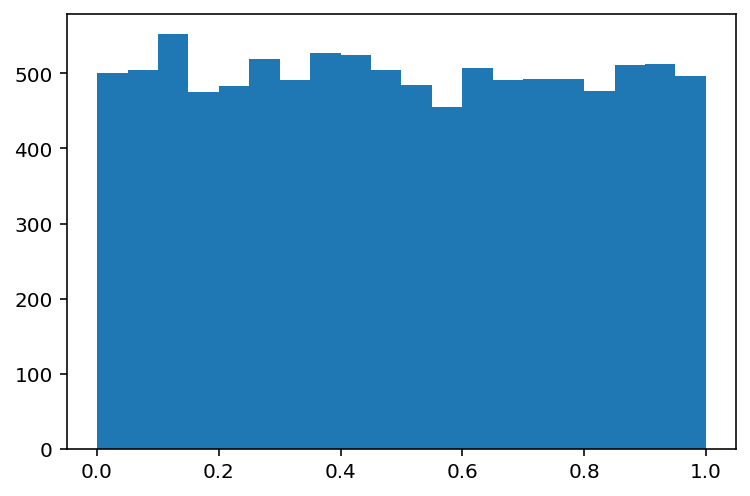

In [23]:
#plt.plot(np.random.rand(1000), 'o', color='green', alpha=0.5)
plt.hist(np.random.rand(10000),20)

In [25]:
#np.random.seed(18493) 
np.random.randn(10) # Generates standard random numbers N(0,1)

array([-0.76788637, -0.53905755, -1.24710639, -0.24673143,  1.80795497,
        2.32029373, -0.75966702,  0.10507974, -1.87250218,  0.66088794])

(array([ 19.,  41.,  97., 160., 212., 212., 151.,  66.,  27.,  15.]),
 array([-2.76068112, -2.19600661, -1.63133209, -1.06665758, -0.50198306,
         0.06269145,  0.62736596,  1.19204048,  1.75671499,  2.32138951,
         2.88606402]),
 <a list of 10 Patch objects>)

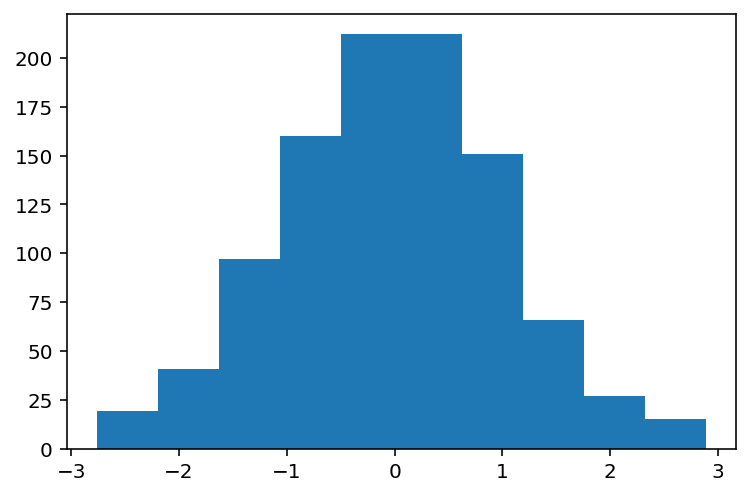

In [27]:
#plt.plot(np.random.randn(1000), 'o', alpha=0.5)

plt.hist(np.random.randn(1000))

Parametraized random number allow you to set parameters like value of mean and interval length and therefore can be viewed as generalized versions of standard random numbers. Below we take a look at examples of continuous (random and unofrm RVs) and discrete random numbers generated by paratmerized distributions. 

In [29]:
np.random.uniform(low=-1, high=1, size=(3, 4))

array([[ 0.57525283, -0.72080226, -0.43095536,  0.51928935],
       [ 0.46765364, -0.08496121, -0.19682187,  0.05462895],
       [-0.69111412, -0.45212563,  0.5032513 , -0.84412603]])

In [32]:
np.random.normal(loc=8, scale=10, size=(4, 4))

array([[11.75642956,  2.95665782,  6.99100847, -2.64322959],
       [ 1.99877827,  1.47095808, 15.30512398, 13.56537818],
       [14.47090771, 23.81481908,  4.67927242,  2.31362845],
       [12.35669801, 23.63221026, -6.15055258,  2.82066676]])

In [35]:
np.random.binomial(n=10, p=0.6, size=20) # This one is Binomial distributions. You can see it is discrete as  exepcted. 

array([3, 3, 5, 6, 5, 4, 4, 9, 3, 4, 6, 7, 4, 5, 7, 5, 8, 8, 5, 5])

### Using random numbers to get answers via simulations 

One of the major uses of random numbers is for conducting numerical simulations. What is a simulation? It is a recreation of a process on a computer. And this recreation is done by random numbers. E.g to simulate coint tosses, die throws, diffusion of molecules, conformational change of polymers we use random number to recreate the process on a computer. Let's start off by asking some simple questions

- How often do we get a run of 5 or more consecutive heads in 100 coin tosses if we repeat the experiment 1000 times?
<br>
- What if the coin is biased to generate heads only 40% of the time?

In [36]:
L = 100 # length of each trajectory
N = 1      # number of experiments: stochastic trajecotries generated

xs = np.random.choice([0,1], (L, N)) # (i) Unbiased coin p=[0.5,0.5] by default

ys = np.random.choice([0,1], (L, N), p=[0.9, 0.1])  # (ii) biased coin

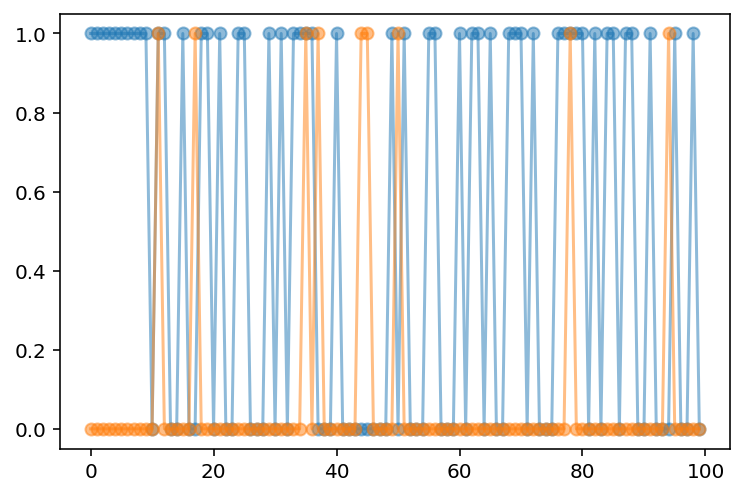

In [37]:
plt.plot(xs,'-o',alpha=0.5)
plt.plot(ys,'-o',alpha=0.5)

In [8]:
np.random.seed(12738)
# Non-fancy way of simulating the answer
runs = 0
for x in xs:    # plug either xs or ys
    m = 0
    for i in x:
        if i == 1:
            m += 1
            if m >=5:
                runs += 1
                break
        else:
            m = 0
runs

825

### Simple, discrete, unbiased random walk in 1D.

 Let's start off by simulating a random walk outlined in class by using a random number generators from numpy called choice and normal. Type help(np.random.choice) and help(np.random.normal) to learn more. 

* The <em>numpy.random.choice(A,size=(M,N,K))</em> returns element from a list of objects, A with uniform and equal probabilities (default, customizable for unequal probabilities)  in the form of 1D, 2D or 3D arays of length M,N,K. 

In [38]:
# Let's import random numbers we will need
from numpy.random import normal, choice, uniform

In [39]:
choice(['bagel','muffin','croissant'],size=(3,5))

array([['muffin', 'muffin', 'bagel', 'bagel', 'croissant'],
       ['muffin', 'bagel', 'muffin', 'bagel', 'muffin'],
       ['croissant', 'bagel', 'croissant', 'bagel', 'croissant']],
      dtype='<U9')

* The <em>numpy.random.normal(mu,sigma,size=(M,N,K))</em> retruns random number distributed according to gausian probability function in the form of 1D, 2D or 3D arays of length N,M,K 

In [10]:
# Here we generate 3 sequences of normally distributed random variables of length 5
normal(0,2,(3,5))

array([[-2.69161384, -1.76025845,  2.6359338 , -1.27629114,  0.28905087],
       [ 1.10431222, -2.35128534,  1.62603244, -0.08737834,  0.95731216],
       [-0.47182587, -0.10790324,  0.85141111,  0.9185157 , -0.58355616]])

### Simulating a 1D unbiased random walk 

In [40]:
'''Step 1: Generate random walks'''

L = 500 # number of steps in a random walk
N = 50  # number of independent random walkers

# i. Create N by L matrix filled with {+1,-1} numbers. 
walk = choice([-1,1], size=(L, N)) 

# ii. Compute cumulative sum: make each element of array the sum of the previous ones: 
rw_sum = walk.cumsum(axis=0)

#iii. Specify initital condition. 
rw_sum[0,:]=0                    #rw_sum = np.r_[np.zeros((1,N)), rw_sum] # what does this do? 

rw_sum.shape

(500, 50)

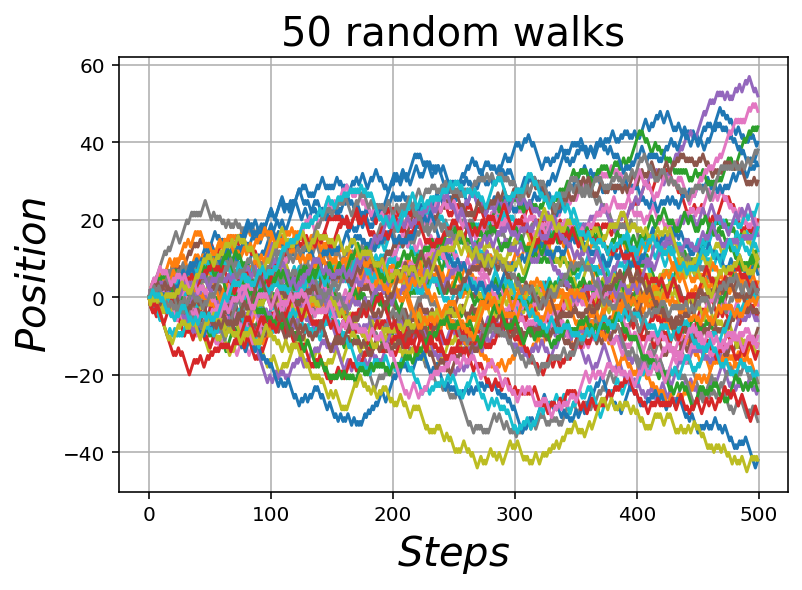

In [41]:
'''Step 2: Visualize random walks'''

plt.plot(rw_sum)  # plot each column from 0 to L-th row. [plt.plot(rw_sum[:,i]) for i in np.arange(N)]

plt.title(f'{N} random walks', fontsize=20)
plt.xlabel(r'$Steps$',fontsize=20)
plt.ylabel(r'$Position$',fontsize=20)

plt.grid('--')

In [38]:
#rows acessed via first index and correspond to individual trajectories
print(rw_sum[0,:].shape)
print(rw_sum[0,:])

(50,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
# jth column acessed viasecond index corresponds to jth positions of awalker
print(rw_sum[:,0].shape)
#print(rw_sum[:,0])

(500,)


### Statistics of random walk

In [42]:
from scipy.stats import norm # we need this to fit to normal distribution

In [45]:
#help(norm.pdf) 

In [46]:
def rw_1d(L, N=1):
    
    '''1d random walk function:
    L: trajectory length
    N: Number of trajecotry
    '''
    rw = choice([-1,1], size=(L, N))
    
    rw_sum=rw.cumsum(axis=0)

    rw_sum[0,:]=0
    
    return rw_sum

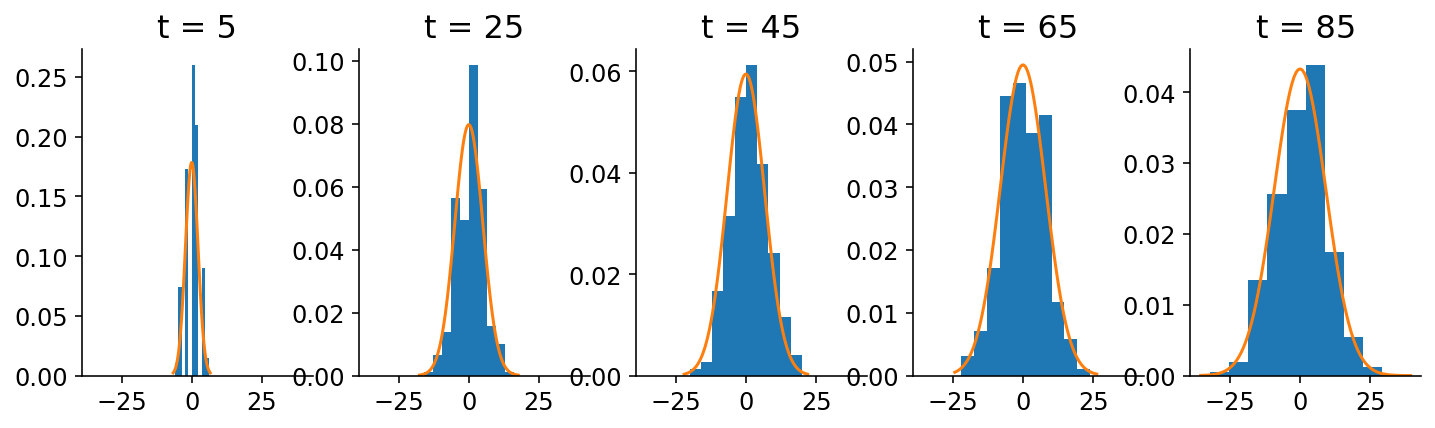

In [112]:
fig, ax = plt.subplots(1, 5, figsize=(12, 3), sharex=True) 

L=100
N=1000
rw_sum = rw_1d(L,N)

for i in range(5):  
    
    t = int(i*(L/5)) + 5                   # record dist at 5 equidist points
    
    ax[i].hist(rw_sum[t,:], density=True)  # generate histogram at different points
    
    # Fit histogram to normal dist 
    xmin, xmax = ax[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    
    y = norm.pdf(x, 0, np.sqrt(t))
    
    ax[i].plot(x,y)  
    
    ax[i].set_title(f"t = {t}")

### Connection with diffusion: Mean square displacement 

Text(0, 0.5, '$MSD(n)=\\langle x(n)^2 \\rangle$')

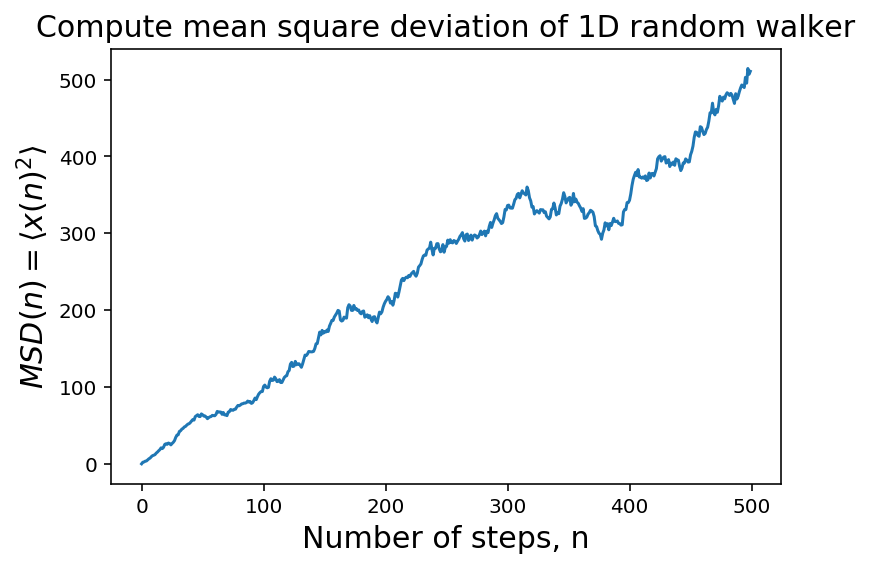

In [47]:
# Determine the time evolution of the mean square distance.
plt.plot(np.mean(rw_sum**2,axis=1)) # why only rw**2 and not mean(rw-mean(rw))**2 ? 

plt.title('Compute mean square deviation of 1D random walker',fontsize=15)
plt.xlabel('Number of steps, n',fontsize=15)
plt.ylabel(r'$MSD(n)=\langle x(n)^2 \rangle$',fontsize=15)

In [57]:
# Questions: 
# (i)  Compute MSD for @D random walk show the expected scaling 
# (ii) Generate random walks from different positions
# (iii) choice between [-1,1] 
# (iv)  Multinomial choice
# (v)  Self avoiding walks

In [59]:
def rw_2d(L, N=1):
    
    '''2d random walk function:
    L: trajectory length
    N: Number of trajecotry
    '''
    verteces = np.array([(1,0),(0,1),(-1,0),(0,-1)])
    
    rw       = verteces[choice([0,1,2,3], size=(L, N))]
    
    rw_sum[0, :, :] = 0
    
    return rw.cumsum(axis=0)

In [60]:
%%time
rw_sum = rw_2d(1000,5)
rw_sum.shape

CPU times: user 768 µs, sys: 588 µs, total: 1.36 ms
Wall time: 734 µs


(1000, 5, 2)

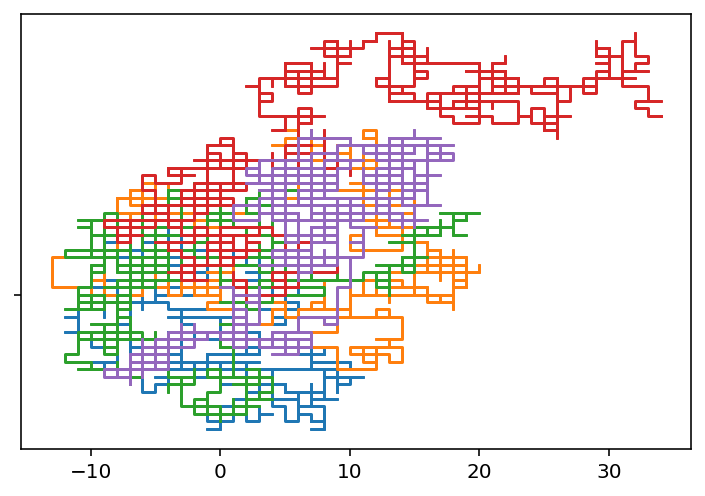

In [61]:
plt.plot(rw_sum[:,:,0], rw_sum[:,:,1])
plt.plot('')

### Binomial distribution of a random walker

- In previous example we started with random variables with no reference to probability distribution. 
    This time we will generate random numbers from a binomial distribution. 

- This time we will use scipy.stats library which contains probability distirbution functions. That is in addition to generating random variables we can also compute probability distributions and related quantities analytically. 

In [62]:
from scipy.stats import binom, norm, poisson  

In [195]:
#help(binom)

In [63]:
s =  binom(10, 0.5) # Let us declare s to be a binomial RV

In [197]:
print(s.rvs(20))          # 20 random samples form X
print(s.pmf(5))           # P(X = 5)
print(s.cdf(5))           # P(X <= 5)
print(s.mean())           # E[X], mean
print(s.var())            # Var(X), variance
print(s.std())            # Std(X), standard deviation

[7 4 4 4 7 3 5 6 5 3 4 5 4 4 9 3 6 5 7 3]
0.24609375000000025
0.6230468749999999
5.0
2.5
1.5811388300841898


In [64]:
def coin_flip(L,p,N):
    
    '''
    L: flip coint L times 
    q: with p probability
    N: Repeat experiment N times
    ''' 
    coin       = binom(L, p)   # Binomial RV
    
    coin_flips = coin.rvs(N)   # Generate sample of N points
    coin_pmf   = coin.pmf(np.arange(L+1)) # Generate PMF from 0 to L 
    coin_cdf   = coin.cdf(np.arange(L+1))
    
    return coin_flips, coin_pmf, coin_cdf

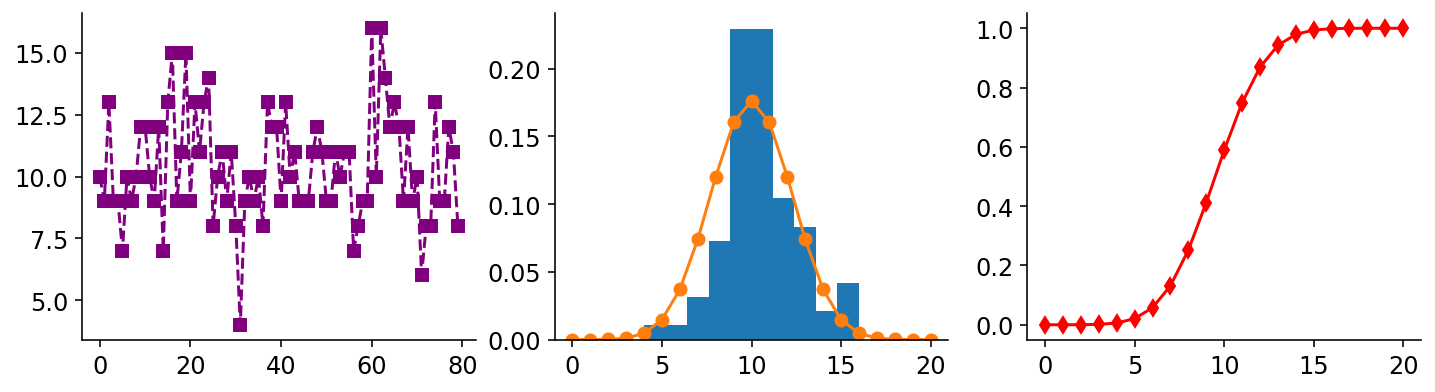

In [221]:
fig, ax=plt.subplots(nrows=1, ncols=3,figsize=(12,3))

#Coin flip 1 time.
X1, P1, CP1 = coin_flip(20, 0.5, 80)

ax[0].plot(X1,'--s',color='purple')

ax[1].hist(X1,density=True)
ax[1].plot(P1,'-o')

ax[2].plot(CP1,'-d',color='red')

## Continuous time random walk:  Brownian motion

We have learned about random variables, random walk and have encorunetred a concept of stochastic process on the example of discrete step 1D random walk. Now let us generate the prototypical stochasic process in continuous time; the brownian motion. Brownian motion was first discoverd by a botanist Brown who noticed that a pollen in solution undergo erratic and incessant motion. To simulate brownian motion we take the continuous time limit of random walk and approximate dsiplacements of our particle as normally distributed (binomial->normal, time step->continuous time)

$$x(t+dt)-x(t)=N(0,\sqrt{2D dt})$$ 

We assume we have started at position $\mu=0$ and our variance is given by $\sigma^2=2Dt$ Where D is the diffusion coefficnets which is related to parameters of discree random walk as shown in the lecture.  

$$x(t+dt)=x(t)+\sqrt{2D dt} \cdot N(0,1)$$ 

In the last step we re-wrote brownian motion equation in a convenient way by shifting normally distributed radnom variable by $\mu$ and scaling it by $\sigma$ 

$$N(\mu, \sigma^2)=\mu+\sigma N(0,1)$$. 

In [65]:
def brown(T, N=1, dim=1, dt=1, D=1):
    
    """
    Creates 2D brownian path given:
    time T 
    N=1 trajecotires
    dim=2: 2D by default
    dt=1 timestep
    D=1 diffusion coeff
    """
    
    nT = int(T/dt) # how many points to sample
    
    dR = np.sqrt(2*D*dt) * np.random.randn(dim, nT, N) # 3D position of brownian particle
    
    R = np.cumsum(dR, axis=1) # accumulated 3D position of brownian particle
    
    return R

### Brownian motion in 1D

In [66]:
R=brown(1000,N=50,dim=1)
R.shape

(1, 1000, 50)

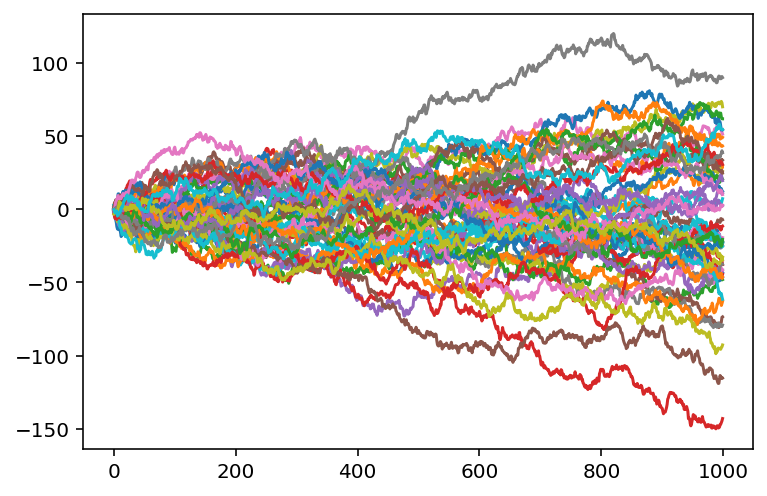

In [67]:
plt.plot(R[0,:])
print('')

### Brownian motion in 2D

In [68]:
R=brown(1000,N=10,dim=2)
R.shape

(2, 1000, 10)

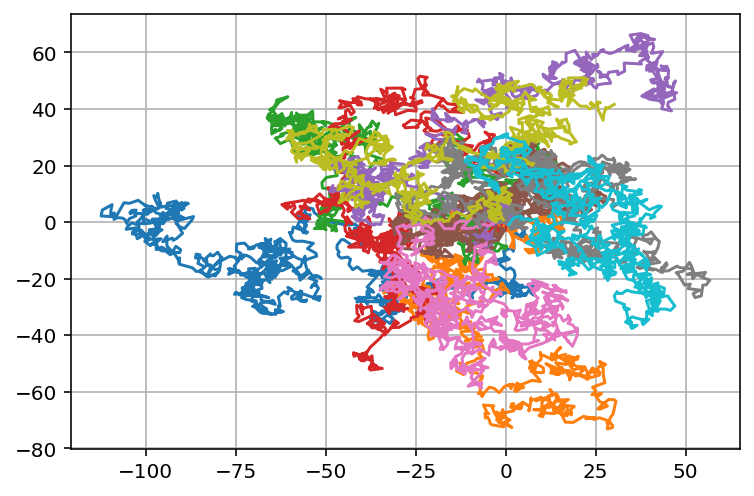

In [70]:
plt.plot(R[0,:],R[1,:])
plt.grid('--')

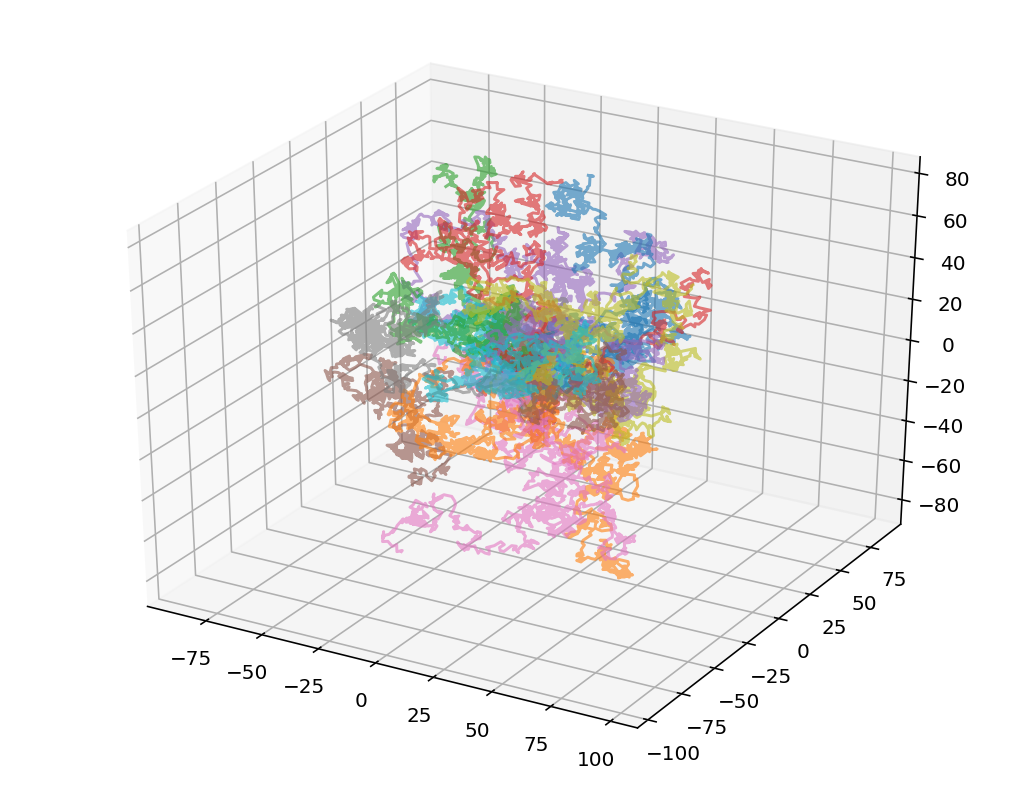

In [74]:
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7))
ax = plt.axes(projection='3d')


for i in range(20):
    
    R=brown(1000,N=1,dim=3)
    
    ax.plot3D(R[0,:,0],R[1,:,0],R[2,:,0],alpha=0.6)

#ax.set_axis_off()

### Statistics of Brownian motion 

In [295]:
R = brown(1000, N=10000, dim=1)
R.shape

(1, 1000, 10000)

(array([4.72389807e-05, 3.41170416e-04, 2.75560721e-03, 8.79694796e-03,
        1.65651359e-02, 1.54314004e-02, 6.74467669e-03, 1.64811555e-03,
        1.41716942e-04, 1.57463269e-05]),
 array([-92.68669146, -73.63462923, -54.582567  , -35.53050477,
        -16.47844254,   2.57361969,  21.62568192,  40.67774415,
         59.72980638,  78.78186861,  97.83393084]),
 <a list of 10 Patch objects>)

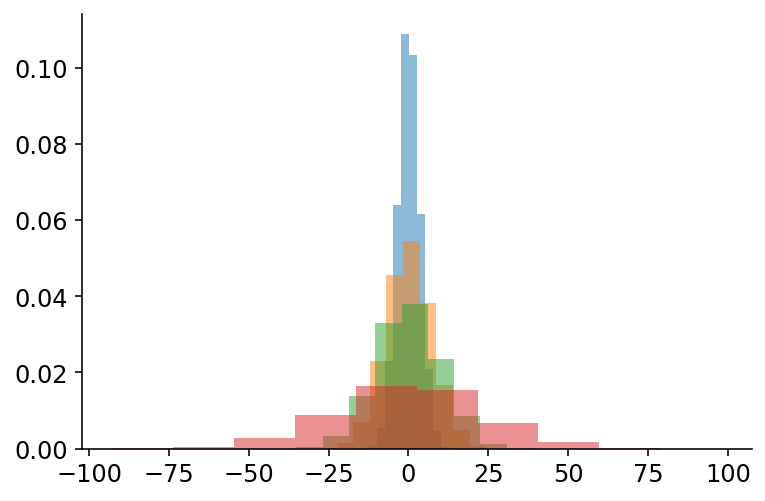

In [306]:
plt.hist(R[0,5,:],   alpha=0.5,  density=True)
plt.hist(R[0,25,:],  alpha=0.5,  density=True)
plt.hist(R[0,50,:], alpha=0.5, density=True)
plt.hist(R[0,250,:], alpha=0.5, density=True)

### Diffusion Equation

The movement of individual random walkers $\leftrightarrow$ density of walkers $\rho(\vec{r},t)$

**Diffusion equation**:

Formulated empirically as [Fick's laws](https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion)

$$\frac{\partial\rho}{\partial t} = \mathcal{D}\nabla^2\rho$$

- This is a 2nd order PDE! Unlike equations of motion diff eq shows irreersibile behaviour 
- This one exactly solvable. But in general reaction-diffusion PDEs difficult to solve analytically.
- Can solve numerically by writing derivatives as finite differences!
- Can also simulate via random walk!
- Diffusion coefficient $D$, Units $[L^2]/[T]$

Important special case solution (here written in 1d):

$$\rho(x,t) = \frac{1}{\sqrt{2\pi \sigma(t)^2}}\exp\left(-\frac{x^2}{2\sigma(t)^2}\right),$$

where $\sigma(t)=\sqrt{2{D}t}$

- density remains Gaussian
- Gaussian becomes wider with time
- check that this is indeed a solution by plugging into the diffusion equation!

In [4]:
import ipywidgets as widgets

# time dependent sigma
def sigma(t, D = 1):
    return np.sqrt(2*D*t)

# density function is gaussian
def gaussian(x, t):
    return  1/np.sqrt(2*np.pi*sigma(t)**2) * np.exp(-x**2/(2*sigma(t)**2)) #

@widgets.interact(t=(0.001,1,0.001))
def diffusion(t=0.001):
    
    x = np.linspace(-4, 4, 1000)
    
    plt.plot(x, gaussian(x, 0.001), '--', color='orange')
    
    plt.plot(x, gaussian(x, t), lw=3, color='green')

interactive(children=(FloatSlider(value=0.001, description='t', max=1.0, min=0.001, step=0.001), Output()), _d…

## References

**The mighty little books**
-  ["Random Wlaks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)
- ["Noise and fluctuations",  DKC MacDonald (2003)](https://www.amazon.com/Noise-and-Fluctuations-An-Introduction/dp/0486785157/ref=sr_1_1?keywords=fluctuation+noise&qid=1579882150&s=books&sr=1-1)
- ["Investigations on the Theory of the Brownian Movement", A Einstein (1956 preprint)](https://www.amazon.com/Investigations-Theory-Brownian-Movement-Physics/dp/0486603040/ref=sr_1_2?keywords=einstein+brownian&qid=1579882356&sr=8-2)

**More in depth**
 
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)
 
**On the applied side**

- [Brownian Motion: Elements of Colloid Dynamics A P Philipse (2018)](https://www.amazon.com/Brownian-Motion-Elements-Dynamics-Undergraduate/dp/3319980521/ref=sr_1_7?keywords=einstein+brownian&qid=1579882356&sr=8-7)